# Ejercicio K-Means

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

1. Importar archivo "Mall_Customers.csv"\
   El spending Score hace referencia a que tanto compra un cliente
   https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/data

In [4]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


2. Hacer un describe de la tabla y analizar los valores

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


3. Verificar si es que hay datos faltantes

In [8]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

4. Realizar un histograma de las 3 variables numéricas

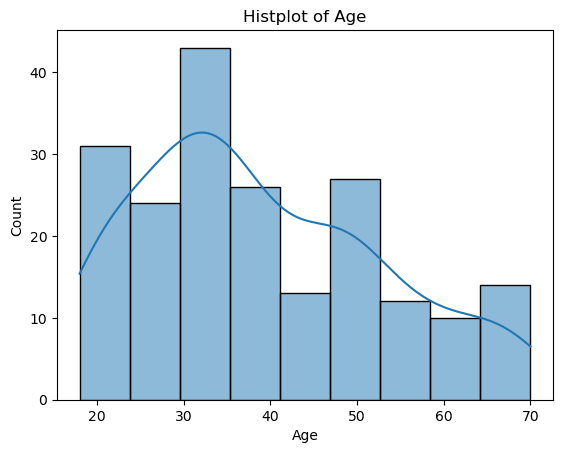

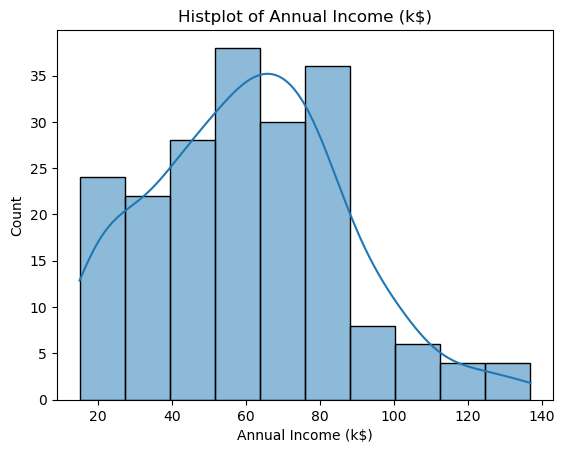

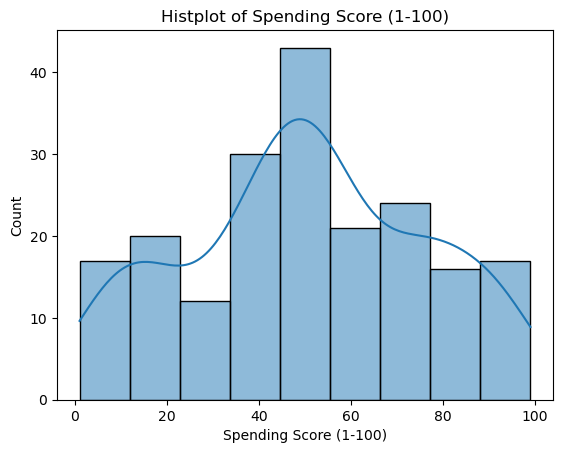

In [10]:
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    sns.histplot(df[x], kde = True)
    plt.title(f'Histplot of {x}')
    plt.show()

5. Realizar gráfico de barras mostrando cantidad de hombres y mujeres

<Axes: xlabel='Gender', ylabel='count'>

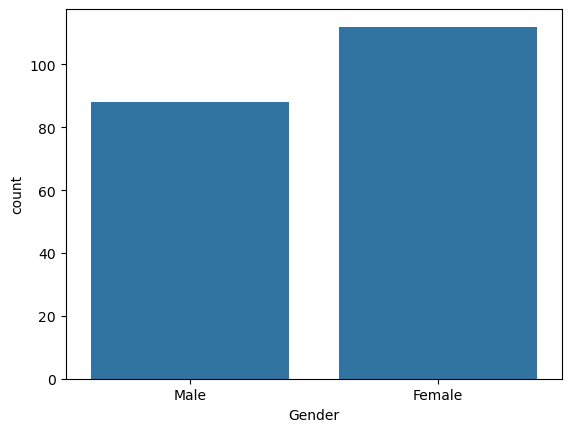

In [12]:
sns.countplot(x = 'Gender' , data = df)

6. Analizar correlación entre las 3 columnas numéricas.\
   En la clusterización es algo malo que dos columnas estén muy correlacionadas, crees que lo correcto sería usar todas?

In [14]:
df.iloc[:,2:5].corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


7. Normalizar los datos de la tabla (con valores numéricas).

In [16]:
df_integer = df.iloc[:,2:]
df_norm = (df_integer-df_integer.min())/(df_integer.max()-df_integer.min())
df_norm.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959


8. Realizar clusterización con las columnas Age y Annual Income (k$)
   * Analizar con el metodo del codo el número de cluster óptimo
   * Agregar columna con cluster a copia dataset
   * Graficar los clusters
   * Calcular silueta

In [18]:
modelo = KMeans(
        n_clusters = 5,
        n_init = 10,
        max_iter=300
    )

modelo.fit(df_norm)
modelo.labels_
modelo.inertia_

C:\Users\esthe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


10.303964892534122

In [19]:
data = df_norm.loc[: , ['Age','Annual Income (k$)']]
suma_error = []
for i in range(1 , 11):
    modelo = KMeans(
        n_clusters = i,
        n_init = 10 ,
        max_iter=300
    )
    modelo.fit(data)
    suma_error.append(modelo.inertia_)

C:\Users\esthe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\esthe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\esthe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\esthe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

In [20]:
suma_error

[23.5839061503636,
 13.028938428018288,
 7.492113413237458,
 6.055858644812545,
 4.733776701093292,
 3.8720495122088674,
 3.0547174363693586,
 2.64269394692181,
 2.3135720353543285,
 2.054229033189198]

<Axes: >

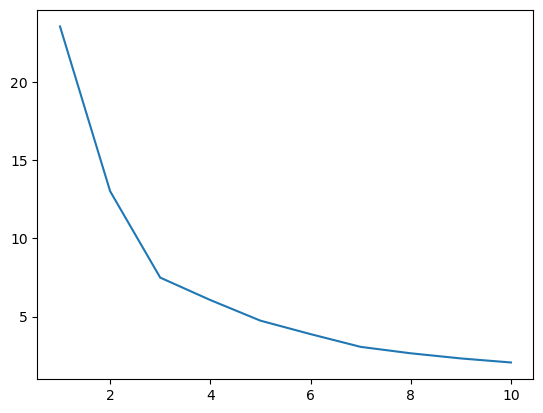

In [21]:
sns.lineplot(
    x = range(1, len(suma_error) + 1),
    y = suma_error
)

<Axes: xlabel='clusters', ylabel='Error'>

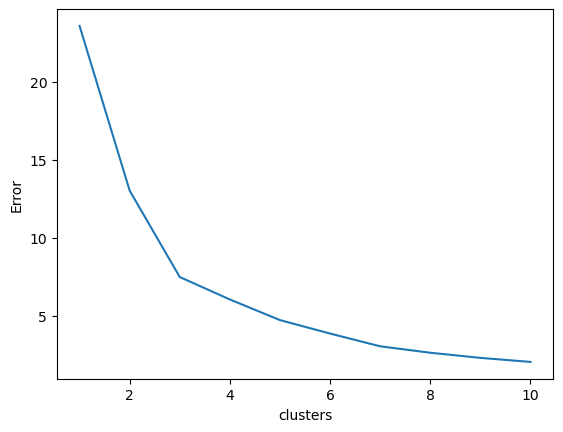

In [22]:
tabla_codo = pd.DataFrame(
    {
        "clusters": range(1, len(suma_error) + 1),
        "Error": suma_error
    }
)
sns.lineplot(data = tabla_codo, x = "clusters", y = "Error")

In [23]:
modelo = KMeans(
    n_clusters = 3,
    n_init = 10,
    max_iter=3000,
    random_state = 1
)
modelo.fit(data)
df1 = df.copy()
df1["Cluster"] = modelo.labels_

C:\Users\esthe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

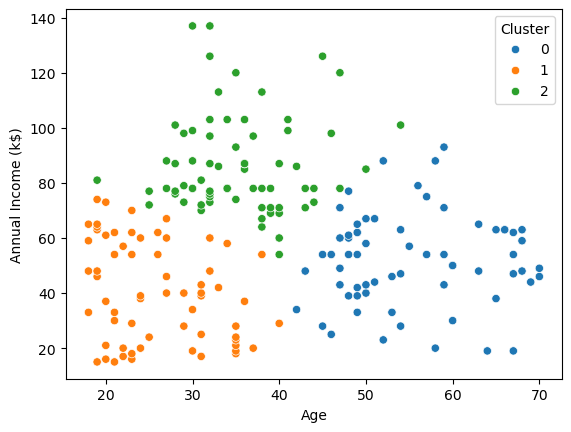

In [24]:
sns.scatterplot(
    data = df1,
    x = "Age", 
    y = "Annual Income (k$)", 
    hue = "Cluster",
    palette = "tab10"
)

In [25]:
from sklearn.metrics import silhouette_score

# Métricas para K-Means
data = df_norm.loc[: , ['Age','Annual Income (k$)']]

silhouette_kmeans = silhouette_score(data, df1["Cluster"])
print("\nMétricas para K-Means:")
print("Silhouette Score:", silhouette_kmeans)


Métricas para K-Means:
Silhouette Score: 0.44048063969161466


In [26]:
df1.iloc[:,2:].groupby("Cluster").agg(["mean","count", "max", "min"])

Age               Annual Income (k$)                 \
              mean count max min               mean count  max min   
Cluster                                                              
0        55.415385    65  70  42          51.923077    65   93  19   
1        25.937500    64  40  18          40.640625    64   74  15   
2        35.323944    71  54  19          86.422535    71  137  54   

        Spending Score (1-100)                
                          mean count max min  
Cluster                                       
0                    38.861538    65  60   3  
1                    55.578125    64  99   5  
2                    55.732394    71  97   1

9. Realizar clusterización con las columnas Annual Income (k$) y Spending Score (1-100)
   * Analizar con el metodo del codo el número de cluster óptimo
   * Agregar columna con cluster a copia dataset
   * Graficar los clusters
   * Calcular silueta

In [28]:
data = df_norm.loc[: , ['Spending Score (1-100)', 'Annual Income (k$)']]
suma_error = []
for i in range(1 , 11):
    modelo = KMeans(
        n_clusters = i,
        n_init = 10 ,
        max_iter=300
    )
    modelo.fit(data)
    suma_error.append([i, modelo.inertia_])

C:\Users\esthe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\esthe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\esthe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\esthe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

In [29]:
suma_error

[[1, 23.04072032603991],
 [2, 13.993505283127977],
 [3, 9.058985215159455],
 [4, 6.110312266413656],
 [5, 3.5831179059525606],
 [6, 3.1003435707513756],
 [7, 2.6260623772655096],
 [8, 2.2195418845609187],
 [9, 1.8813913677590235],
 [10, 1.638784374641233]]

<Axes: xlabel='clusters', ylabel='Error'>

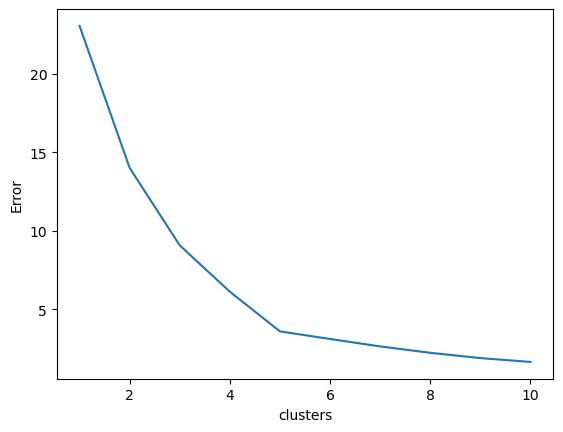

In [30]:
tabla_codo = pd.DataFrame(suma_error,columns=["clusters", "Error"])
sns.lineplot(data = tabla_codo, x = "clusters", y = "Error")

In [31]:
data = df_norm.loc[: , ['Spending Score (1-100)', 'Annual Income (k$)']]
modelo = KMeans(
    n_clusters = 5,
    n_init = 10,
    max_iter=300
)
modelo.fit(data)
df2= df.copy()
df2["Cluster"] = modelo.labels_

C:\Users\esthe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

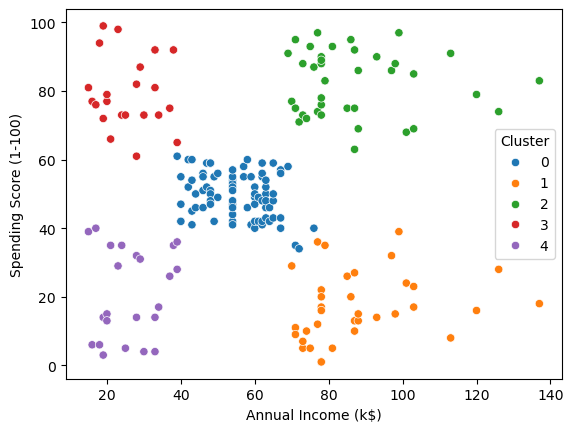

In [32]:
sns.scatterplot(
    data = df2,
    x = 'Annual Income (k$)', 
    y = "Spending Score (1-100)", 
    hue = "Cluster",
    palette = "tab10"
)

In [33]:
from sklearn.metrics import silhouette_score

# Métricas para K-Means
silhouette_kmeans = silhouette_score(data, df2["Cluster"])
print("\nMétricas para K-Means:")
print("Silhouette Score:", silhouette_kmeans)


Métricas para K-Means:
Silhouette Score: 0.5594854531357839


10. Realizar clusterización con las columnas Age, Annual Income (k$) y Spending Score (1-100)
   * Analizar con el metodo del codo el número de cluster óptimo
   * Agregar columna con cluster a copia dataset
   * Calcular silueta

In [35]:
data = df_norm.loc[: , ['Age','Spending Score (1-100)', 'Spending Score (1-100)']]
suma_error = []
for i in range(1 , 11):
    modelo = KMeans(
        n_clusters = i,
        n_init = 10 ,
        max_iter=300
    )
    modelo.fit(data)
    suma_error.append([i, modelo.inertia_])

C:\Users\esthe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\esthe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\esthe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\esthe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

In [36]:
suma_error

[[1, 41.9959138543112],
 [2, 19.526636024084056],
 [3, 12.890190968259681],
 [4, 8.114436048746526],
 [5, 6.5614261118309924],
 [6, 5.142734353177492],
 [7, 4.255384228113336],
 [8, 3.6355700304643537],
 [9, 3.2337145558894886],
 [10, 2.894243246153704]]

<Axes: xlabel='clusters', ylabel='Error'>

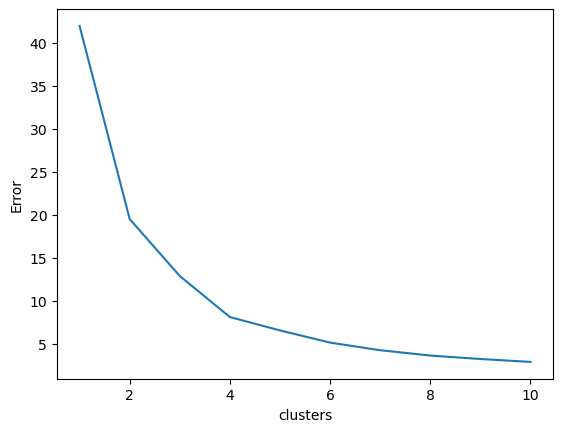

In [37]:
tabla_codo = pd.DataFrame(suma_error,columns=["clusters", "Error"])
sns.lineplot(data = tabla_codo, x = "clusters", y = "Error")

In [38]:
data = df_norm.loc[: , ['Age','Spending Score (1-100)', 'Spending Score (1-100)']]
modelo = KMeans(
    n_clusters = 4,
    n_init = 10,
    max_iter=300
)
modelo.fit(data)
df3 = df.copy()
df3["Cluster"] = modelo.labels_

C:\Users\esthe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [39]:
from sklearn.metrics import silhouette_score

# Métricas para K-Means
silhouette_kmeans = silhouette_score(data, df3["Cluster"])
print("\nMétricas para K-Means:")
print("Silhouette Score:", silhouette_kmeans)


Métricas para K-Means:
Silhouette Score: 0.475571709758284


11. Interpretar los clusters del punto anterior y asignarle un nombre a cada uno de los clusters

In [41]:
df3.iloc[:,2:].groupby("Cluster").agg(["max","mean","min"]).round(1)
# 0 = bajo consumo
# 1 = joven de alto consumo
# 2 = adulto de consumo promedio
# 3 = joven de consumo promedio


Age           Annual Income (k$)           Spending Score (1-100)  \
        max  mean min                max  mean min                    max   
Cluster                                                                     
0        40  30.2  18                137  66.1  15                     99   
1        67  43.3  19                137  67.0  16                     35   
2        70  56.0  43                 79  54.4  38                     60   
3        41  27.6  18                 99  53.3  15                     66   

                   
         mean min  
Cluster            
0        82.4  68  
1        15.4   1  
2        48.5  35  
3        49.1  29

In [42]:
# 0 = bajo consumo
# 1 = joven de alto consumo
# 2 = adulto de consumo promedio
# 3 = joven de consumo promedio
df3["Cluster"] = df3["Cluster"].map(
    {
        0: 'bajo consumo',
        1: 'joven de alto consumo',
        2: 'adulto de consumo promedio',
        3: 'joven de consumo promedio',
    }
)

In [43]:
df3.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,joven de consumo promedio
1,2,Male,21,15,81,bajo consumo
2,3,Female,20,16,6,joven de alto consumo
3,4,Female,23,16,77,bajo consumo
4,5,Female,31,17,40,joven de consumo promedio


In [44]:
df3.groupby(["Cluster", "Gender"]).size()

Cluster                     Gender
adulto de consumo promedio  Female    26
                            Male      21
bajo consumo                Female    33
                            Male      24
joven de alto consumo       Female    24
                            Male      25
joven de consumo promedio   Female    29
                            Male      18
dtype: int64

In [45]:
df2.iloc[:,3:].groupby("Cluster").agg(["max","mean","min"]).round(1)

Annual Income (k$)           Spending Score (1-100)          
                       max  mean min                    max  mean min
Cluster                                                              
0                       76  55.3  39                     61  49.5  34
1                      137  88.2  70                     39  17.1   1
2                      137  86.5  69                     97  82.1  63
3                       39  25.7  15                     99  79.4  61
4                       39  26.3  15                     40  20.9   3